In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

In [24]:
df = pd.read_csv('E4_ACC_data.csv')
df.head()

,datatime,acc_x,acc_y,acc_z,label,subject_id
0,2021-10-27 16:13:08+00:00,2,2,56,downstairs,2
1,2021-10-27 16:13:08.031250+00:00,1,2,57,downstairs,2
2,2021-10-27 16:13:08.062500+00:00,0,3,61,downstairs,2
3,2021-10-27 16:13:08.093750+00:00,1,2,64,downstairs,2
4,2021-10-27 16:13:08.125000+00:00,2,2,60,downstairs,2


In [25]:
df.describe()

,acc_x,acc_y,acc_z,subject_id
count,63522.000000,63522.000000,63522.000000,63522.000000
mean,-5.320818,18.338245,23.066686,1.560215
std,39.691330,36.506514,28.612878,0.496365
min,-128.000000,-110.000000,-128.000000,1.000000
25%,-40.000000,-6.000000,0.000000,1.000000
50%,-6.000000,7.000000,22.000000,2.000000
75%,32.000000,42.000000,50.000000,2.000000
max,127.000000,127.000000,127.000000,2.000000


In [26]:
df.shape

(63522, 6)

In [27]:
df.isnull().any()

datatime      False
acc_x         False
acc_y         False
acc_z         False
label         False
subject_id    False
dtype: bool

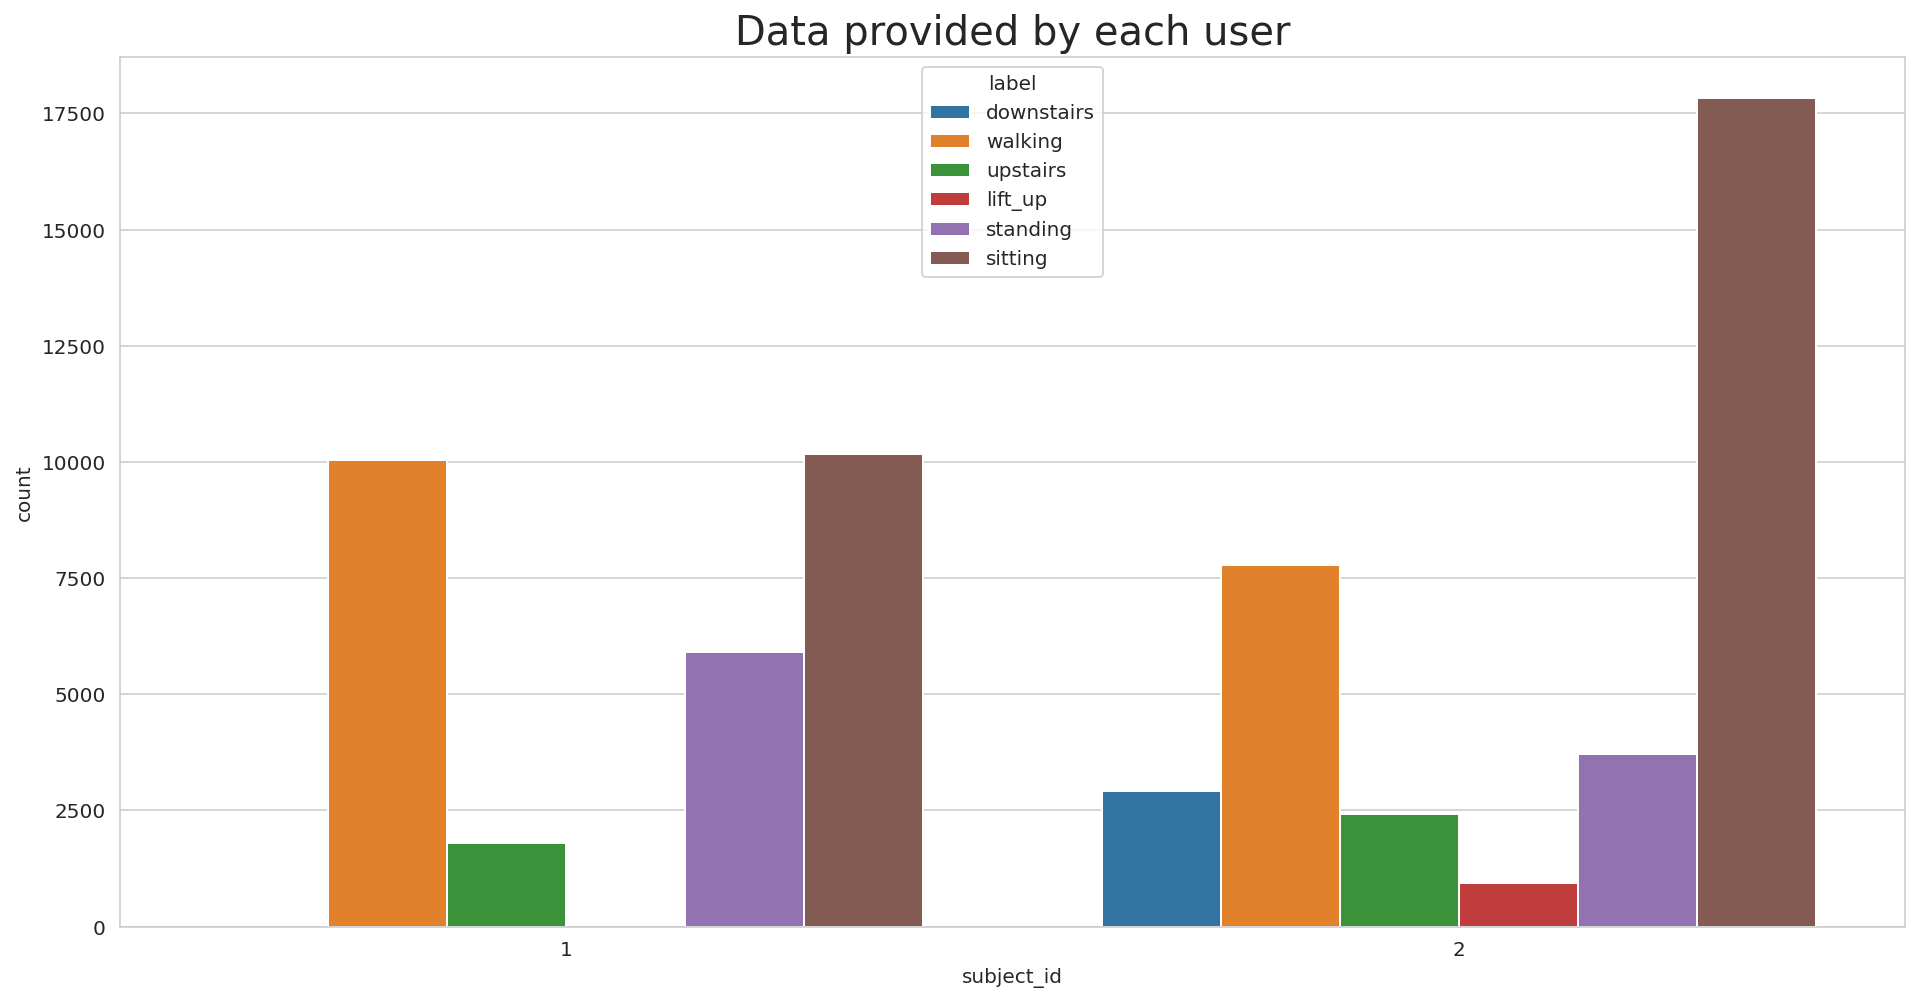

In [28]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = df)
plt.show()

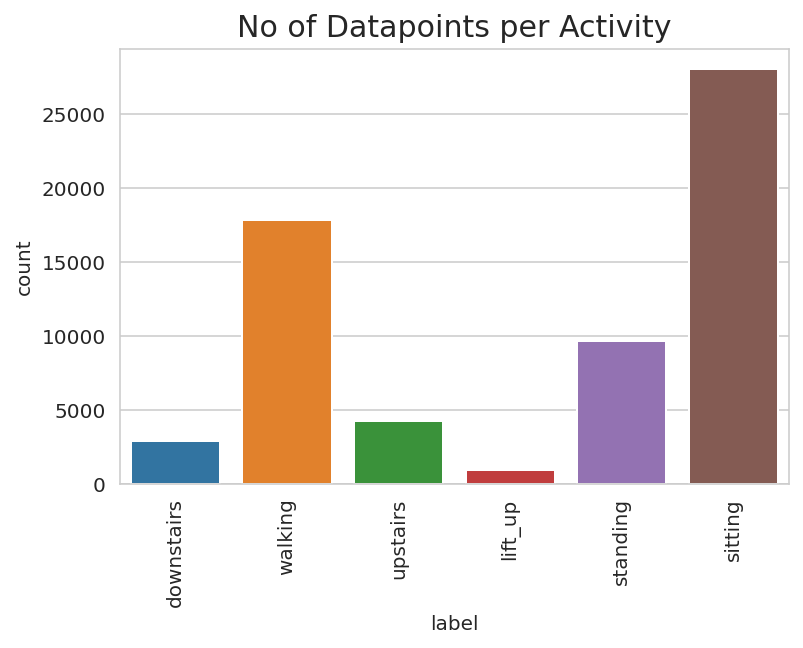

In [29]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(df.label)
plt.xticks(rotation=90)
plt.show()

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import keras
from keras import models
from keras import layers
import numpy as np
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
random.seed(321)

In [31]:
tf.keras.backend.set_floatx('float64')


In [32]:
tf.__version__


'2.6.1'

In [33]:
df.head()

,datatime,acc_x,acc_y,acc_z,label,subject_id
0,2021-10-27 16:13:08+00:00,2,2,56,downstairs,2
1,2021-10-27 16:13:08.031250+00:00,1,2,57,downstairs,2
2,2021-10-27 16:13:08.062500+00:00,0,3,61,downstairs,2
3,2021-10-27 16:13:08.093750+00:00,1,2,64,downstairs,2
4,2021-10-27 16:13:08.125000+00:00,2,2,60,downstairs,2


In [43]:
df = df.reindex(columns = ['acc_x', 'acc_y', 'acc_z', 'subject_id', 'label'])
df

,acc_x,acc_y,acc_z,subject_id,label
0,2,2,56,1,0
1,1,2,57,1,0
2,0,3,61,1,0
3,1,2,64,1,0
4,2,2,60,1,0
...,...,...,...,...,...
63517,18,37,56,0,4
63518,25,39,54,0,4
63519,37,45,56,0,4
63520,45,52,66,0,4


In [36]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

activity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(activity_name_mapping)

{'downstairs': 0, 'lift_up': 1, 'sitting': 2, 'standing': 3, 'upstairs': 4, 'walking': 5}


In [46]:
X = df.iloc[:, [0, 1, 2]].values
y = df.iloc[:, -1].values

In [47]:
X

array([[ 2,  2, 56],
       [ 1,  2, 57],
       [ 0,  3, 61],
       ...,
       [37, 45, 56],
       [45, 52, 66],
       [49, 56, 71]], dtype=int64)

In [48]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred = classifier.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 204    7   64   16   39  244]
 [   1   95   51    3    1    8]
 [  55   38 5323   67   33   86]
 [  25    9  117 1470   71  244]
 [  70    4   56  110  282  381]
 [ 184    9  201  318  256 2563]]
